In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/up-crime-data-year-2019/MR data - Compiled Data Set.csv


# Getting data

In [2]:
train_df = pd.read_csv("/kaggle/input/up-crime-data-year-2019/MR data - Compiled Data Set.csv")

Since Title and Text are not really needed for visualization so dropping the Title and Text column

### Kicking these useless columns out for visulization 

In [3]:
train_df = train_df.drop(axis = 1, labels = ['Title','Text'])

We might need colum names for the reference later so just stores the names of the columns and rename the original column names for ease of reading and visualization

### Strip those annoying spaces at the end of the column names and keeping the column names for later use

In [4]:
train_df.columns = train_df.columns.str.rstrip()
cols_for_reference = train_df.columns.to_list()
print(cols_for_reference)

['City', 'Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other', 'Number of child victims', 'Number of male victims(adult)', 'Number of female victims(adult)', 'Kidnnaping:\nNumber of child victims', 'Number of male(adult)', 'Number of female(adult)', 'Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act', 'Number of adult victims', 'Number of childs invoved']


### Renaming the big fat column names

In [5]:
train_df = train_df.rename(columns={
    "Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act":
    "Crime Against Women (Combined)"
})

train_df = train_df.rename(columns={
    'Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other':
    "Reason_for_Murder"
})

"""Number of rows in whole data to get the count of missing values in the data"""
print(len(train_df)) 

466


> ## "Reason of crime" mapped with number for the column with crime against women

In [6]:
vals = cols_for_reference[8].split("\n")
vals = vals[1:]
vals = [val[3:] for val in vals]
reason_mapping = (dict(zip(range(10), vals)))
reason_mapping
actions = pd.DataFrame(reason_mapping, index= range(1), columns=vals)

In [7]:
train_df["Crime Against Women (Combined)"].unique()
for idx, vals in enumerate(train_df["Crime Against Women (Combined)"]):
    if(type(vals) == str):
        if(len(vals) <= 2):
            if(int(vals) == 11):
                actions.loc[idx, reason_mapping[int(vals)-2]] = 1
            else:
                actions.loc[idx, reason_mapping[int(vals)-1]] = 1
        else :
            lst = vals.split(",")
            for num in lst:
                actions.loc[idx, reason_mapping[int(num)-1]] = 1
    else:
        actions.loc[idx] = np.nan

> ### "Reason of crime" appended with the original training set

In [8]:
train_df = pd.concat([train_df, actions], axis=1)

### Null value check!

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 21 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   City                                                                466 non-null    object 
 1   Reason_for_Murder                                                   147 non-null    object 
 2   Number of child victims                                             13 non-null     float64
 3   Number of male victims(adult)                                       95 non-null     float64
 4   Number of female victims(adult)                                     47 non-null     float64
 5   Kidnnaping:
Number of child victims                                 11 non-null     float64
 6   Number of male(adult)                                               8 non-null      float64
 7   Number of female(

So, we can see that no city have null values so we do not need to delete any row for that matter. We can see that crime againts women combined have the maximum number of null values and the values are object so let's just the column which do not have numerical values

In [10]:
train_df.tail(10)

,City,Reason_for_Murder,Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women (Combined),Number of adult victims,...,Murder with Rape,Dowry Deaths(Sec. 3048),Suicide(sec 305/306),Kidnapping(All),Acid Attack(Sec. 326A IPC),Cruelty by Husband/in-laws((Sec.498 A IPC),Rape only(Sec. 376 or 511 IPC),Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC),Cyber Crimes against Women,Protection of Children from Sexual Offences Act
456,Lucknow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
457,Lucknow,Love Affairs,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,Lucknow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
459,Lucknow,Unknown reasons,1.0,1.0,1.0,NaN,NaN,NaN,1,1.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,Lucknow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
461,Lucknow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
462,Lucknow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,Lucknow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3,8",NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN
464,Lucknow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
465,Lucknow,Petty Quarrels,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### What are the darn reasons?!

In [11]:
train_df['Crime Against Women (Combined)'].unique()
train_df["Reason_for_Murder"].unique()

array([nan, 'Money Disputes', 'Love Affairs', 'Unknown reasons',
       'Petty Quarrels', 'Property Disputes', 'Family Dispute',
       'Personal Vendetta', 'Casteism'], dtype=object)

#### Fill the missing val

In [12]:
cols_to_impute = ["Number of child victims", "Number of female victims(adult)","Number of male victims(adult)",
                  "Number of male(adult)",'Number of female(adult)', 'Number of adult victims', 'Number of childs invoved',
                 "Kidnnaping:\nNumber of child victims"]
train_df[cols_to_impute] = train_df[cols_to_impute].fillna(value = 0 )

In [13]:
train_df.isnull().sum()

City                                                                    0
Reason_for_Murder                                                     319
Number of child victims                                                 0
Number of male victims(adult)                                           0
Number of female victims(adult)                                         0
Kidnnaping:\nNumber of child victims                                    0
Number of male(adult)                                                   0
Number of female(adult)                                                 0
Crime Against Women (Combined)                                        266
Number of adult victims                                                 0
Number of childs invoved                                                0
Murder with Rape                                                      447
Dowry Deaths(Sec. 3048)                                               447
Suicide(sec 305/306)                  

In [14]:
def get_row_col_index(idx):
    '''Returns the position of rows and columns in a subplot'''
    row_idx = idx//2
    if(idx%2 == 0):
        col_idx= 0
    else: col_idx = 1
    return (row_idx, col_idx)

In [15]:
def write_percent(ax):
    """Writes the percentage on top of the bar"""
    total_size = len(train_df)
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100
        
        ax.text(left_coord+ width/2.0, height, '{:1.1f}%'.format(percent), ha = "center")
    

## People are still killing each other for love! </3

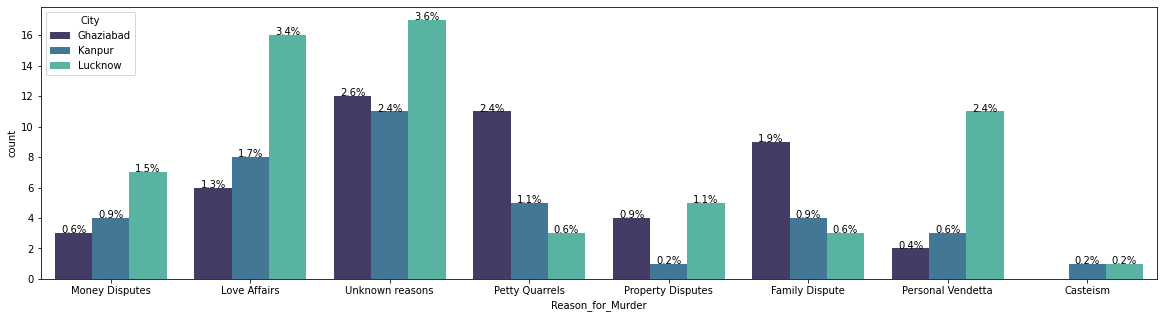

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,5))
sns.countplot(x = "Reason_for_Murder", data=train_df, hue = "City", ax = ax, palette="mako")
write_percent(ax)

### People in Ghaziabad need to stop killing family for internal issues. 
From above graph we can see that mostly crime happens because of **Love Affairs** in **Lucknow** and kanpur but this is not the case for the city Ghaziabad, there it happens mainly because of Family Disputes

### Victims based on Gender
Save those men! 

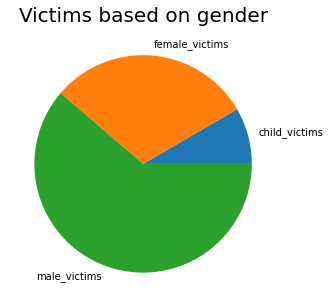

In [17]:

child_vics = train_df[train_df["Number of child victims"] != 0]
female_vics = train_df[train_df["Number of female victims(adult)"] != 0]
male_vics = train_df[train_df["Number of male victims(adult)"] != 0 ]

plt.figure(figsize = (5,5))
values = [len(child_vics), len(female_vics), len(male_vics)]
labels = ["child_victims", "female_victims", "male_victims"]
plt.title('Victims based on gender',fontsize = 20)
plt.pie(x = values,labels = labels)
plt.show()



### Victims based on gender in Kanpur

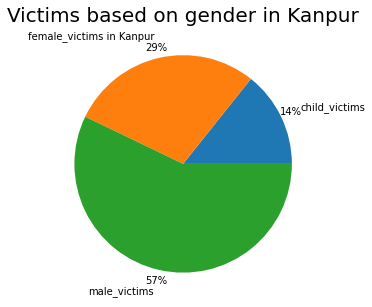

In [18]:
child_vics = train_df[(train_df["Number of child victims"] != 0) & (train_df["City"] == "Kanpur")]
female_vics = train_df[(train_df["Number of female victims(adult)"] != 0) & (train_df["City"] == "Kanpur")]
male_vics = train_df[(train_df["Number of male victims(adult)"] != 0) & (train_df["City"] == "Kanpur")]

plt.figure(figsize = (5,5))
values = [len(child_vics), len(female_vics), len(male_vics)]
labels = ["child_victims", "female_victims in Kanpur", "male_victims"]
plt.title('Victims based on gender in Kanpur',fontsize = 20)
plt.pie(x = values,labels = labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show()


### Victims based on gender in Lucknow

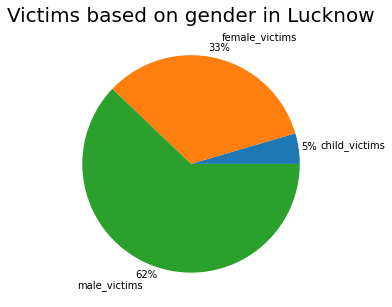

In [19]:
child_vics = train_df[(train_df["Number of child victims"] != 0) & (train_df["City"] == "Lucknow")]
female_vics = train_df[(train_df["Number of female victims(adult)"] != 0) & (train_df["City"] == "Lucknow")]
male_vics = train_df[(train_df["Number of male victims(adult)"] != 0) & (train_df["City"] == "Lucknow")]

plt.figure(figsize = (5,5))
values = [len(child_vics), len(female_vics), len(male_vics)]
labels = ["child_victims", "female_victims", "male_victims"]
plt.title('Victims based on gender in Lucknow',fontsize = 20)
plt.pie(x = values,labels = labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show()


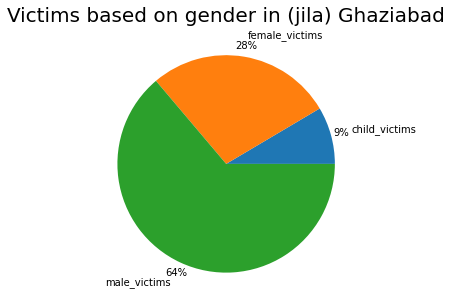

In [20]:
child_vics = train_df[(train_df["Number of child victims"] != 0) & (train_df["City"] == "Ghaziabad")]
female_vics = train_df[(train_df["Number of female victims(adult)"] != 0) & (train_df["City"] == "Ghaziabad")]
male_vics = train_df[(train_df["Number of male victims(adult)"] != 0) & (train_df["City"] == "Ghaziabad")]

plt.figure(figsize = (5,5))
values = [len(child_vics), len(female_vics), len(male_vics)]
labels = ["child_victims", "female_victims", "male_victims"]
plt.title('Victims based on gender in (jila) Ghaziabad',fontsize = 20)
plt.pie(x = values,labels = labels,  autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show()


From the above pie-chart it is quite evident that the male_victims are more than combined femaled and child victims everywhere in each city. The child victims are lowest in Lucknow and highest in Kanpur. Female victims are highest in Lucknow while lowest in Ghaziabad

# Let's see the bigger picture!

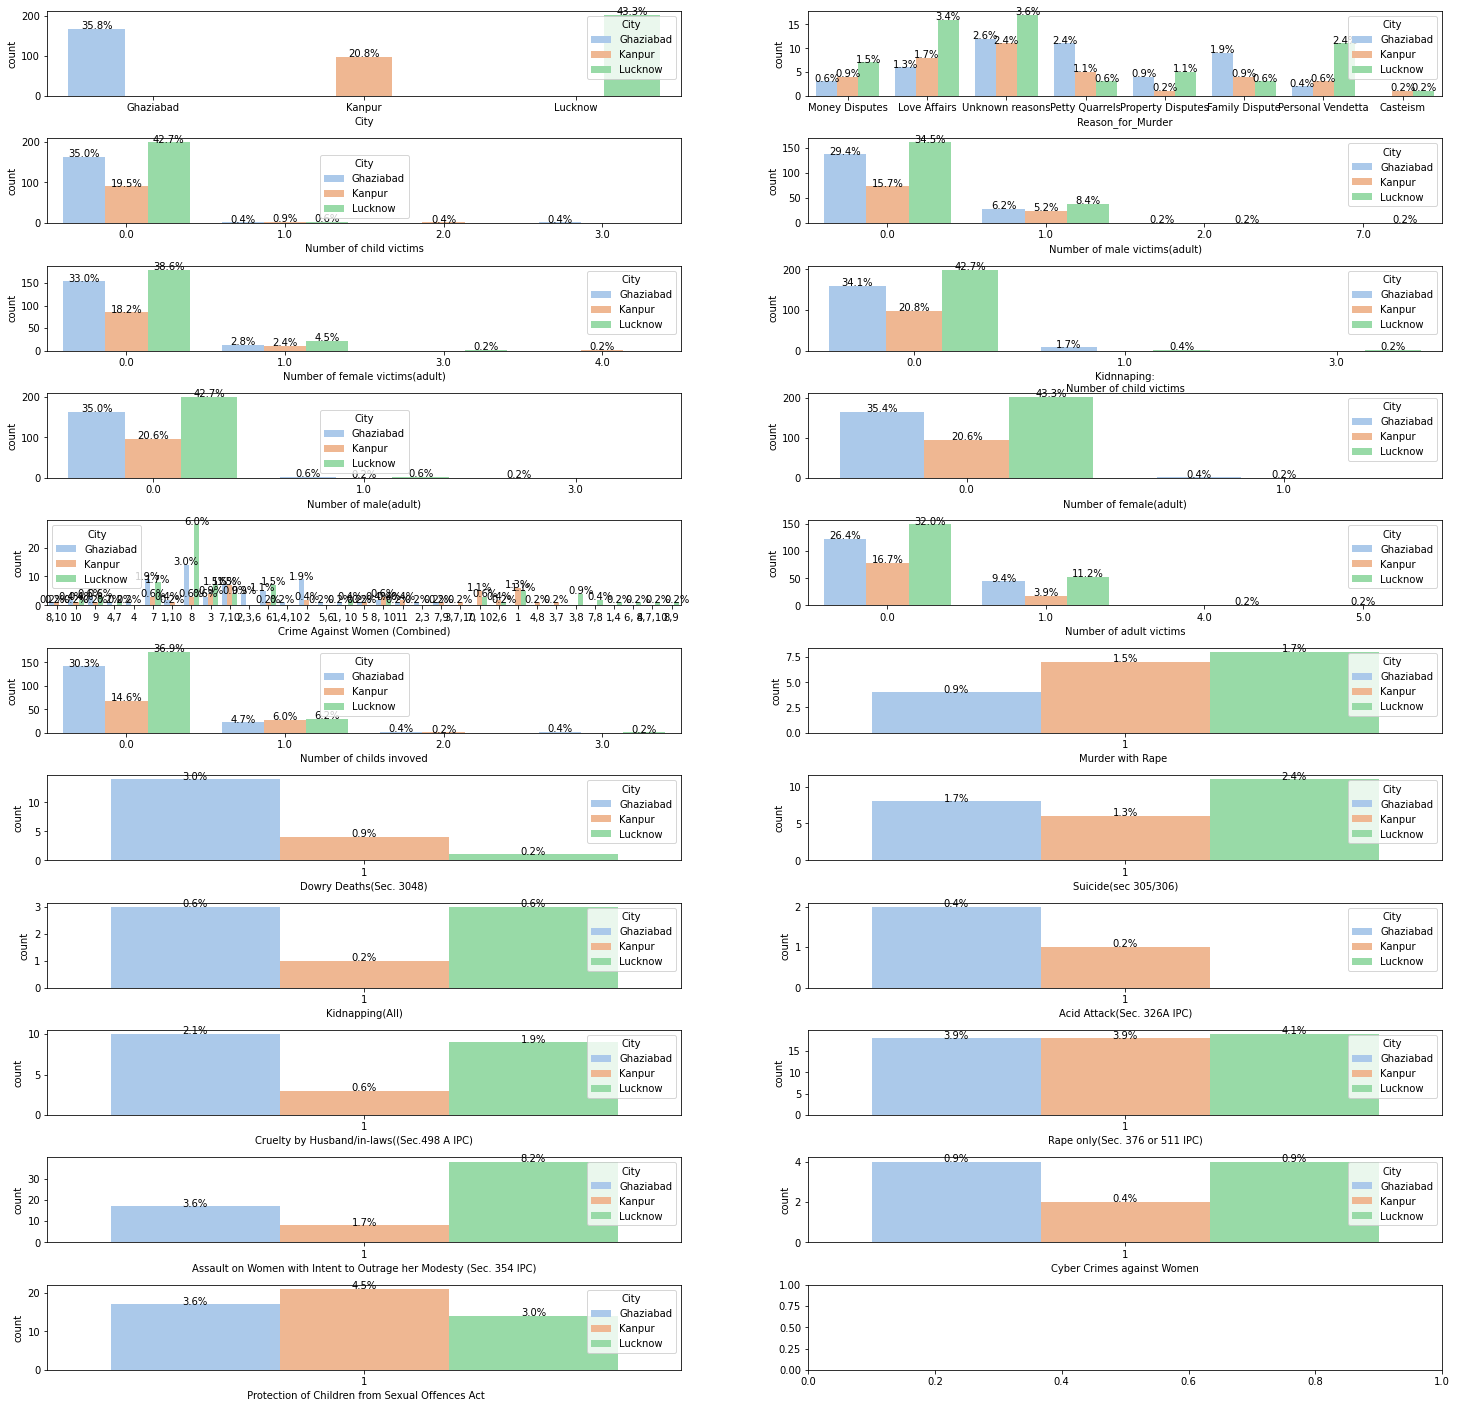

In [21]:
fig, axes = plt.subplots(nrows = 11, ncols= 2)
fig.set_size_inches(25, 25
                   )
plt.subplots_adjust(wspace=0.2, hspace=0.5)
for idx, cols in enumerate(train_df.columns):
    row ,col = get_row_col_index(idx)
    ax = axes[row, col]
    
    sns.countplot(data = train_df, x = cols, hue = "City",  palette='pastel',ax = ax)
    write_percent(ax)

From the graph we can see that among the three cities, lucknow has been referred abput 43% of the times, so it can be said that crimes happens mostly in Lucknow.

* Child victims are less in every city in comapred to adult victims
* Male victims are more than female victims for every city
* Kidnapping cases are only in city Ghaziabd


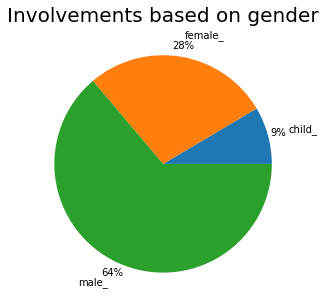

In [22]:

child = train_df[train_df["Number of childs invoved"] != 0]
female = train_df[train_df["Number of female(adult)"] != 0]
male = train_df[train_df["Number of male(adult)"] != 0 ]

plt.figure(figsize = (5,5))
values = [len(child_vics), len(female_vics), len(male_vics)]
labels = ["child_", "female_", "male_"]
plt.title('Involvements based on gender',fontsize = 20)
plt.pie(x = values,labels = labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show()

We can guess that males are more involved in crime!

### Let's look at what kind of crime is mostly done against women!

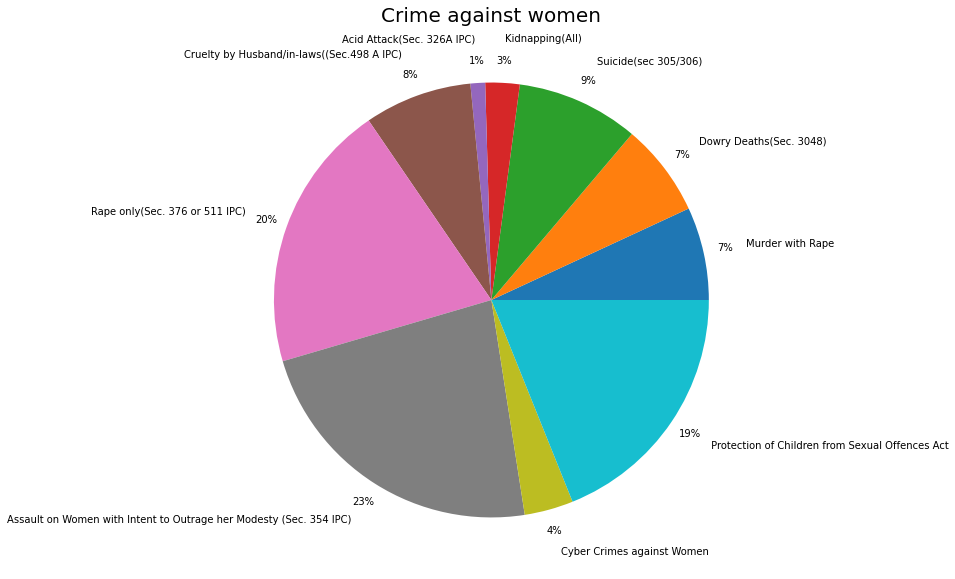

In [23]:
map_crime_against_wmn = {}
for vals in reason_mapping.values():
    map_crime_against_wmn[vals] = train_df[vals].sum()


plt.figure(figsize = (10,10))
plt.title('Crime against women',fontsize = 20)
plt.pie(x =  map_crime_against_wmn.values(), labels = map_crime_against_wmn.keys(), autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show()

Pie chart tell us that the major contribution of crime against women are frome Assault to outrage her modesty, rape and protection of children from sexual offences Act. Even though Acid Attack contributes very little to the whole pie chart but even that 1% should not be there!
